# Algoritma Tree Decision

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# read file
df = pd.read_csv('[Dataset]_Train_(Keryawan).csv')
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# Preprocess Data


In [3]:
#data tidak lengkap
nan_data = df[df.isna().any(axis=1)]
nan_data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,...,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
19,EID_12947,M,32.0,3,Single,Lebanon,IT,Conceptual,7.0,4,...,type2,1.0,3,NaN,0.7075,1.0,1,5,4,0.6410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,EID_18566,F,NaN,1,Single,Washington,R&D,Conceptual,4.0,2,...,type3,4.0,3,0.7516,-1.6150,3.0,4,6,3,0.0986
6975,EID_2706,F,52.0,3,Married,Clinton,R&D,Conceptual,25.0,1,...,type2,3.0,3,NaN,0.7075,NaN,3,7,3,0.1496
6976,EID_15099,M,28.0,4,Married,Franklin,Operarions,Conceptual,NaN,3,...,type3,4.0,3,NaN,-0.4537,2.0,2,7,3,0.2237
6981,EID_25181,M,NaN,3,Married,Springfield,Logistics,Behavioral,17.0,3,...,type2,1.0,4,1.6081,-1.6150,NaN,5,8,5,0.1954


In [4]:
# delete data tidak lengkap
df = df.dropna()
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


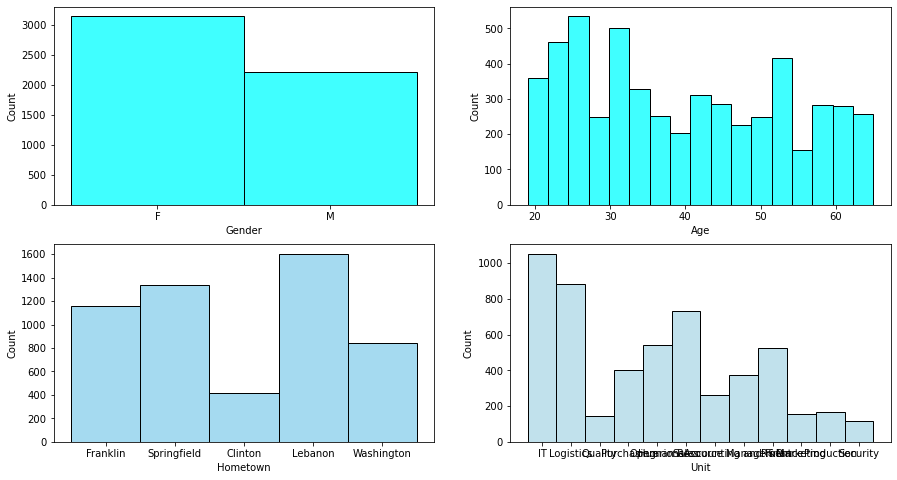

In [5]:
# Visualisasi data
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='Gender',ax=axes[0,0],color='aqua')
sns.histplot(data=df,x='Age',ax=axes[0,1],color='cyan')
sns.histplot(data=df,x='Hometown',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='Unit',ax=axes[1,1],color='lightblue')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [7]:
# Transformasi 
df['Gender'] = encode.fit_transform(df['Gender'].values) 
df['Relationship_Status'] = encode.fit_transform(df['Relationship_Status'].values) 
df['Hometown'] = encode.fit_transform(df['Hometown'].values)
df['Unit'] = encode.fit_transform(df['Unit'].values)
df['Decision_skill_possess'] = encode.fit_transform(df['Decision_skill_possess'].values)
df['Compensation_and_Benefits'] = encode.fit_transform(df['Compensation_and_Benefits'].values)

In [8]:
#hapus kolom tidak perlu
df = df.drop(['Employee_ID'],axis=1)
df = df.drop(['Attrition_rate'],axis=1)

# Normalisasi 

In [9]:
from sklearn.preprocessing import MinMaxScaler
kolom = [col for col in df.columns]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[kolom])
df_scaled = pd.DataFrame(scaled,columns=kolom)

In [10]:
df_scaled

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.0,0.500000,0.75,0.0,0.25,0.181818,0.666667,0.093023,1.00,0.240741,...,0.666667,0.50,0.50,0.75,0.749978,1.000000,0.5,0.75,0.00,0.50
1,1.0,0.108696,0.50,1.0,0.75,0.272727,0.000000,0.116279,1.00,0.296296,...,0.555556,0.50,0.75,0.50,0.249993,0.500000,0.5,0.50,0.00,0.50
2,0.0,0.847826,0.50,0.0,0.00,0.727273,0.666667,0.627907,0.75,0.574074,...,0.777778,0.50,0.00,0.75,0.249993,0.500000,1.0,0.50,0.75,0.50
3,0.0,0.260870,0.00,0.0,0.75,0.272727,0.666667,0.116279,1.00,0.777778,...,0.111111,0.75,0.50,0.00,0.749978,0.500000,0.5,0.25,0.75,0.25
4,1.0,0.760870,0.50,0.0,0.50,0.636364,0.666667,0.441860,0.25,0.018519,...,0.888889,0.50,0.00,0.50,0.000000,1.000000,0.5,0.25,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,0.0,0.086957,1.00,0.0,0.25,0.454545,0.333333,0.093023,0.25,0.000000,...,0.555556,0.75,0.50,0.00,0.749978,0.500000,0.5,0.50,0.50,0.50
5349,0.0,0.543478,0.00,0.0,0.50,0.818182,0.000000,0.372093,0.50,0.722222,...,0.333333,0.75,0.50,0.25,0.499985,0.000000,0.5,0.75,0.75,0.75
5350,0.0,0.652174,0.50,1.0,0.75,0.181818,1.000000,0.232558,0.25,0.722222,...,0.222222,0.50,0.75,0.25,0.499985,0.500000,0.5,0.75,0.75,0.50
5351,0.0,0.608696,0.50,0.0,1.00,0.909091,0.333333,0.558140,0.25,0.018519,...,0.777778,0.00,0.25,0.75,0.749978,1.000000,0.5,0.50,0.25,0.50


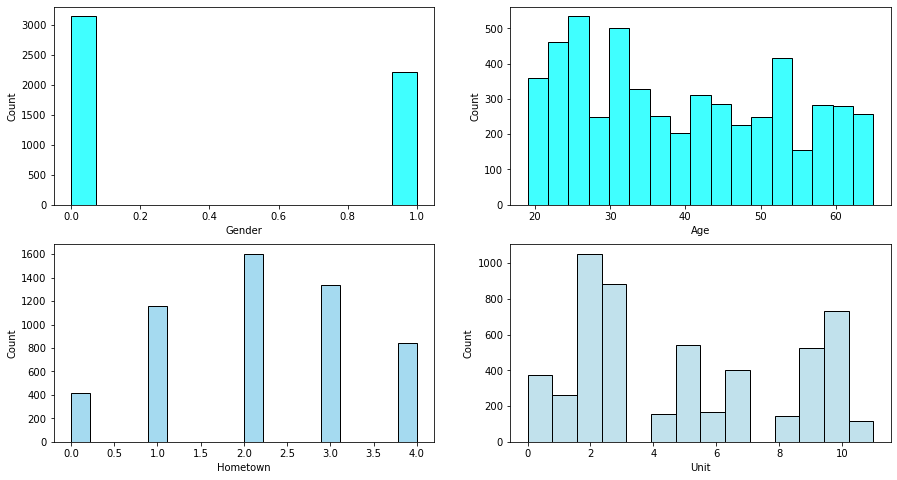

In [11]:
#Visualisasi data
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='Gender',ax=axes[0,0],color='aqua')
sns.histplot(data=df,x='Age',ax=axes[0,1],color='cyan')
sns.histplot(data=df,x='Hometown',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='Unit',ax=axes[1,1],color='lightblue')
plt.show()

In [12]:
#input test data
test_data = pd.read_csv('[Dataset]_Test_(Karyawan).csv')

In [13]:
#pre processing
test_data = test_data.drop(['Employee_ID'],axis=1)
test_data = test_data.dropna()
#encode
test_data['Gender'] = encode.fit_transform(test_data['Gender'].values)
test_data['Relationship_Status'] = encode.fit_transform(test_data['Relationship_Status'].values)
test_data['Hometown'] = encode.fit_transform(test_data['Hometown'].values)
test_data['Unit'] = encode.fit_transform(test_data['Unit'].values)
test_data['Decision_skill_possess'] = encode.fit_transform(test_data['Decision_skill_possess'].values)
test_data['Compensation_and_Benefits'] = encode.fit_transform(test_data['Compensation_and_Benefits'].values)
#normalisasi
test_data_kolom = [col for col in test_data.columns]
test_data_scaled = scaler.fit_transform(test_data[test_data_kolom])
test_data = pd.DataFrame(test_data_scaled,columns=test_data_kolom)
test_data

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.0,0.282609,1.00,1.0,0.75,0.818182,0.666667,0.162791,1.00,0.185185,...,0.333333,0.50,0.00,0.50,0.249993,0.500000,0.5,0.00,0.75,0.75
1,1.0,1.000000,0.25,1.0,0.50,0.181818,1.000000,0.953488,0.50,0.962963,...,0.000000,0.50,0.00,0.75,0.249993,0.749989,0.0,0.25,0.75,0.25
2,1.0,0.717391,0.50,0.0,0.75,0.909091,1.000000,0.488372,0.75,0.092593,...,0.777778,0.75,0.00,0.75,0.499985,0.749989,0.5,0.00,1.00,0.50
3,1.0,0.673913,1.00,1.0,1.00,0.363636,0.000000,0.255814,1.00,0.148148,...,0.111111,0.00,0.75,0.50,0.499985,0.749989,0.5,0.25,0.75,0.50
4,0.0,0.543478,0.50,0.0,0.25,0.818182,0.666667,0.279070,1.00,0.500000,...,0.111111,0.50,0.75,0.75,1.000000,0.749989,0.5,0.25,0.50,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,1.0,0.608696,0.50,0.0,0.25,0.454545,0.333333,0.348837,0.50,0.537037,...,0.888889,0.50,0.50,0.50,0.249993,0.749989,0.5,0.25,0.25,0.75
2317,0.0,0.347826,0.75,1.0,1.00,0.363636,0.666667,0.279070,0.75,0.722222,...,0.555556,0.50,0.50,0.50,0.749978,0.749989,0.5,0.75,0.50,0.50
2318,0.0,0.282609,0.50,1.0,0.25,0.909091,1.000000,0.069767,0.75,0.333333,...,0.555556,0.50,0.25,0.00,0.499985,0.749989,0.0,0.75,0.50,0.75
2319,0.0,0.695652,0.00,0.0,0.75,0.181818,0.333333,0.534884,0.25,0.185185,...,0.555556,0.75,0.00,1.00,0.749978,0.500000,0.5,0.50,1.00,0.25


In [14]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_scaled['Relationship_Status'], test_size=0.2, random_state=42)

In [15]:
# Build Model
model = DecisionTreeClassifier(random_state=42)

In [16]:
# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluasi kinerja model dengan metrik

In [17]:
# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 1.0
Confusion Matrix:
[[677   0]
 [  0 394]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       677
         1.0       1.00      1.00      1.00       394

    accuracy                           1.00      1071
   macro avg       1.00      1.00      1.00      1071
weighted avg       1.00      1.00      1.00      1071



# Uji Coba Model

In [18]:
# Make predictions
new_prediction = model.predict(test_data)
print(f'New Prediction: {new_prediction}')

New Prediction: [1. 1. 0. ... 1. 0. 1.]


<AxesSubplot:ylabel='Count'>

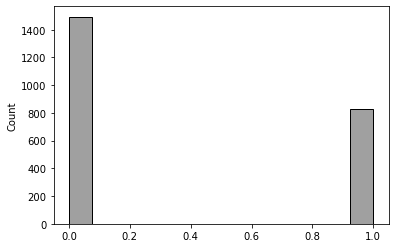

In [22]:
sns.histplot(data=new_prediction,color='gray')